# Gather#

In [349]:
#importing the required libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from datetime import datetime,timedelta
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [350]:
# Read the twitter_archive_enhanced.csv file and load it into a dataframe called df
df = pd.read_csv("C:/NR/Data Science/Term 2/Project 2/twitter-archive-enhanced.csv")

In [249]:
# Programmatically download the dog image prediction files from the Udacity server using Request library
import os
import requests

# Save to a file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [250]:
#open tsv file
images = pd.read_table('image_predictions/image-predictions.tsv',sep='\t')

In [251]:
# Personal API keys, secrets, and tokens have been replaced with placeholders
consumer_key = 'fake'
consumer_secret = 'fake'
access_token = 'fake'
access_secret = 'fake'

In [252]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [253]:
#Twitter Query using tweet_id information from the df.

tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968


Rate limit reached. Sleeping for: 618


Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 616


In [254]:
# Read Jason file
import json

with open('tweet_json.txt', 'w', encoding="utf-8") as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [255]:
# Read the saved tweet_json.txt file into a dataframe
tweet_df = pd.read_json('tweet_json.txt',orient='index')

# Assess

In [351]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [352]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [353]:
tweet_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2531,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,498,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,125,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,123,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,293,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,138,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,106,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [355]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [356]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [357]:
images[images.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [358]:
images[images.jpg_url == 'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True


In [359]:
sum(images['jpg_url'].duplicated())

66

In [360]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [361]:
tweet_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2531,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,498,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,125,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,123,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,293,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,138,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,106,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [362]:
all_columns=pd.Series(list(df)+list(images)+list(tweet_df))
all_columns[all_columns.duplicated()]

17                 tweet_id
40    in_reply_to_status_id
42      in_reply_to_user_id
55                   source
56                     text
dtype: object

In [363]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1556,688828561667567616,NaN,NaN,2016-01-17 21:01:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brad. His car probably has a spoi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688828561...,9,10,Brad,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
617,796387464403357696,NaN,NaN,2016-11-09 16:22:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snicku. He's having trouble reading be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796387464...,12,10,Snicku,None,None,None,None
717,783695101801398276,NaN,NaN,2016-10-05 15:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loomis. He's the leader of the Kenneth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783695101...,12,10,Loomis,None,None,None,None


In [364]:
df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [365]:
df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [366]:
df[df['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [367]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [368]:
tweet_df[tweet_df.id.duplicated()]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user


In [369]:
df.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
an                7
Toby              7
Daisy             7
Bailey            7
Buddy             7
Rusty             6
Jax               6
Dave              6
Scout             6
Leo               6
Bella             6
Jack              6
Koda              6
Oscar             6
Milo              6
Stanley           6
very              5
               ... 
Tilly             1
Bert              1
Izzy              1
Ralf              1
Joshwa            1
Jomathan          1
Anthony           1
Comet             1
Donny             1
Frönq             1
Ike               1
Bones             1
Mark              1
Jennifur          1
Murphy            1
Harrison          1
Gordon            1
BeBe              1
Puff              1


## Quality Issues

This section lists the Quality issues observed in the three datasets. These quality issues include Completeness, Validity, Accuracy, and Consistency issues.

### df dataframe (twitter_archived_enhanced.csv)

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be string data type instead of float data type 
- retweeted_status_timestamp, timestamp should be datetime instead of object (string)
- We only want original ratings (no retweets) that have images

### images dataframe (image_predictions.tsv)

- Some tweet_ids have the same jpg_url. jpg_url records are duplicated
- Create 1 column for image prediction and 1 column for confidence level

### tweet_df dataframe (tweet_Jason.txt)

- Rename the id column to "tweet_id" to match the other 2 tables
- 176 records have a retweeted_status, will need to be excluded 
- id and id_str are duplicate colummns in tweet_df dataframe. Moreover, they are integer, but should be string and renamed as tweet_id to be consistant with the other dataframe 

## Tidiness

- There are 4 dog stages present in 4 columns (doggo, puppo, floofer, pupper) of df dataframe, which should be represented in a single column. So merging them into a single column would be another tidiness issue.
- Three data frames should be one (combined table) since all tables' entries are each describing one tweet

# Cleaning

In [370]:
# Copy the dataframes 
df_clean = df.copy()
images_clean = images.copy()
tweet_df_clean = tweet_df.copy()

## Quality

##### in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be string data type instead of float data type in df_clean dataframe

### Define

> Change the data type of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id to string object

### Code

In [371]:
df_clean.in_reply_to_status_id = df_clean.in_reply_to_status_id.astype(str)
df_clean.in_reply_to_user_id = df_clean.in_reply_to_user_id.astype(str)
df_clean.retweeted_status_id = df_clean.retweeted_status_id.astype(str)
df_clean.retweeted_status_user_id = df_clean.retweeted_status_user_id.astype(str)

### Test

In [372]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(3), object(14)
m

##### retweeted_status_timestamp, timestamp should be datetime instead of object (string)  in df_clean dataframe

### Define

> Change the data type of retweeted_status_timestamp, timestamp to datetime

### Code

In [373]:
#Use pd.to_datetime to convert the column from strings to DateTime objects.
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['retweeted_status_timestamp'] = pd.to_datetime(df_clean['retweeted_status_timestamp'])

### Test

In [374]:
# Test the data type of retweeted_status_timestamp, timestamp to datetime
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: dateti

In [375]:
#Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns 
#called Hour, Day, Month, and Year. You will create these columns based off of the timeStamp column, 
#reference the solutions if you get stuck on this step.

df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [376]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23


In [377]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date          

In [378]:
# remove unwanted columns from df_clean columns
df_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',               
               'text'],axis=1, inplace=True)



In [379]:
#Change the order (the index) of the df_clean columns
columnTitles = ['tweet_id', 
                'date', 
                'time',
                'name',
                'rating_numerator',
                'rating_denominator',
               'doggo',
               'floofer',
               'pupper',
               'puppo']
df_clean = df_clean.reindex(columns=columnTitles)

In [380]:
df_clean.head()

,tweet_id,date,time,name,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,08-01-2017,16:23,Phineas,13,10,None,None,None,None
1,892177421306343426,08-01-2017,00:17,Tilly,13,10,None,None,None,None
2,891815181378084864,07-31-2017,00:18,Archie,12,10,None,None,None,None
3,891689557279858688,07-30-2017,15:58,Darla,13,10,None,None,None,None
4,891327558926688256,07-29-2017,16:00,Franklin,12,10,None,None,None,None


#### Rename the "id" column to "tweet_id" to match the other 2 datasets in the tweet_df_clean dataframe

### Define

> Rename the "id" column to "tweet_id" to match the other 2 datasets in the tweet_df_clean dataframe

### Code

In [381]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

### Test

In [382]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'tweet_id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

#### 176 records have a retweeted_status, will need to be excluded 

### Define

> Identify and exlude tweets that have a retweeted_status because the tweet is a retweet and therefore not original.

### Code

In [383]:
#Single out the non-null values in the 'retweet_status' column
tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-26 06:48:02.905632768,NaN,NaN,2015-11-20 03:51:47,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,0,0,NaN,667550882905632768,667550882905632768,...,NaN,NaN,NaN,33,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-26 06:48:24.950915073,NaN,NaN,2015-11-20 03:51:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/ua...,0,0,NaN,667550904950915072,667550904950915072,...,NaN,NaN,NaN,35,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,0,"{'contributors_enabled': False, 'created_at': ..."
1992-07-24 17:26:49.858043904,NaN,NaN,2016-03-21 19:31:59,"{'hashtags': [{'indices': [61, 73], 'text': 'L...",{'media': [{'display_url': 'pic.twitter.com/j6...,0,0,NaN,711998809858043904,711998809858043904,...,NaN,NaN,NaN,132,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-07-28 05:05:15.802583040,NaN,NaN,2016-06-17 16:01:16,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,743835915802583040,743835915802583040,...,NaN,NaN,NaN,2216,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,0,"{'contributors_enabled': False, 'created_at': ..."
1993-08-28 07:04:05.350707200,NaN,NaN,2016-06-25 01:52:36,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,746521445350707200,746521445350707200,...,NaN,NaN,NaN,1048,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-09-05 15:18:28.580548608,NaN,NaN,2016-06-27 01:37:04,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,747242308580548608,747242308580548608,...,NaN,NaN,NaN,3074,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-03 06:49:54.570878976,NaN,NaN,2016-07-11 01:11:51,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'additional_media_info': {'monetiz...,0,0,NaN,752309394570878976,752309394570878976,...,NaN,NaN,NaN,17934,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-07 19:52:24.171524096,NaN,NaN,2016-07-12 03:11:42,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,0,0,NaN,752701944171524096,752701944171524096,...,NaN,NaN,NaN,3107,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-14 17:37:14.498793472,NaN,NaN,2016-07-13 18:42:44,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,753298634498793472,753298634498793472,...,NaN,NaN,NaN,6182,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-12-02 23:27:21.593970688,NaN,NaN,2016-07-

In [384]:
#remove the tweets that are retweets from the dataset
tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()== True].index,inplace=True)

### Test

In [385]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2173 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2173 non-null datetime64[ns]
entities                         2173 non-null object
extended_entities                1747 non-null object
favorite_count                   2173 non-null int64
favorited                        2173 non-null int64
geo                              0 non-null float64
tweet_id                         2173 non-null int64
id_str                           2173 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  21

> Drop 66 duplicate jpg_url from images_clean dataframe

### Define

> Drop 66 duplicate jpg_url from images_clean dataframe

### Code

In [386]:
#Delete duplicated jpg_url
images_clean = images_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test

In [387]:
# Testing to see there are no duplicate jpg_url in images_clean dataframe
sum(images_clean['jpg_url'].duplicated())

0

In [388]:
images_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1908,852672615818899456,https://pbs.twimg.com/media/C9VNNp1XkAEWRFb.jpg,1,golden_retriever,0.711235,True,otterhound,0.068235,True,Sussex_spaniel,0.046562,True


> Create 1 column for image prediction and 1 column for confidence level

### Define

> Create a function that keeps the first true prediction along the confidence level as new columns.

In [389]:
#CODE: the first true prediction (p1, p2 or p3) will be stored in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level from the first 'true' prediction
def image(images_clean):
    if images_clean['p1_dog'] == True:
        dog_type.append(images_clean['p1'])
        confidence_list.append(images_clean['p1_conf'])
    elif images_clean['p2_dog'] == True:
        dog_type.append(images_clean['p2'])
        confidence_list.append(images_clean['p2_conf'])
    elif images_clean['p3_dog'] == True:
        dog_type.append(images_clean['p3'])
        confidence_list.append(images_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the images_clean column.        
images_clean.apply(image, axis=1)

#create new columns
images_clean['dog_type'] = dog_type
images_clean['confidence_list'] = confidence_list

### Test

In [390]:
#drop rows that has prediction_list 'error'
images_clean = images_clean[images_clean['dog_type'] != 'Error']

#TEST: 
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


> Delete columns from tweet_df_clean that won't be used for analysis

### Define

> Drop columns from tweet_df_clean that we don't find useful for insights and analysis

### Code

In [391]:
# Delete columns
tweet_df_clean = tweet_df_clean.drop(['contributors', 'coordinates','created_at', 'entities', 'extended_entities', 'favorited','in_reply_to_screen_name', 'geo','in_reply_to_status_id','in_reply_to_status_id_str',
                                     'in_reply_to_user_id',
                                     'in_reply_to_user_id_str',
                                     'is_quote_status',
                                     'lang',
                                     'place',
                                     'possibly_sensitive',
                                     'possibly_sensitive_appealable',
                                     'quoted_status',
                                     'quoted_status_id',
                                     'quoted_status_id_str',
                                     'text',
                                     'truncated',
                                     'retweeted_status'], 1)

### Test

In [392]:
#TEST
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2173 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 7 columns):
favorite_count    2173 non-null int64
tweet_id          2173 non-null int64
id_str            2173 non-null int64
retweet_count     2173 non-null int64
retweeted         2173 non-null int64
source            2173 non-null object
user              2173 non-null object
dtypes: int64(5), object(2)
memory usage: 135.8+ KB


> Delete columns from images_clean that won't be used for analysis

### Define

> Drop columns from images_clean that we don't find useful for insights and analysis

### Code

In [393]:
# Delete columns
images_clean = images_clean.drop(['img_num', 'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], 1)

### Test

In [394]:
#TEST
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


In tweet_df_clean, Id and id_str were duplicate columns. Under Quality issues, we have renamed Id as tweet_id to be consistent with the other dataframes. Now, we should remove the duplicate column id_str

### Define

Drop the duplicate columm id_str

### Code

In [395]:
# remove id_str column from tweet_df_clean dataframe
tweet_df_clean.drop(['id_str'], axis=1, inplace=True)

### Test

In [396]:
# Testing id id_str is dropped from tweet_df_clean dataframe
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2173 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 6 columns):
favorite_count    2173 non-null int64
tweet_id          2173 non-null int64
retweet_count     2173 non-null int64
retweeted         2173 non-null int64
source            2173 non-null object
user              2173 non-null object
dtypes: int64(4), object(2)
memory usage: 118.8+ KB


## Tidiness

There are 4 dog stages present in 4 columns (doggo, puppo, floofer, pupper) in df dataframe which should be represented in a single column

### Define

df_clean 4 columns, doggo, floofer, pupper, and puppo columns should be merged into one column

### Code

In [397]:
#doggo, floofer, pupper, and puppo columns should be merged into one column called dog_stage
df_clean['doggo'].replace('None', np.nan, inplace=True)
df_clean['floofer'].replace('None', np.nan, inplace=True)
df_clean['pupper'].replace('None', np.nan, inplace=True)
df_clean['puppo'].replace('None', np.nan, inplace=True)
df_clean['Dog_stage'] = df_clean[['doggo','floofer','pupper','puppo']].fillna('').sum(axis=1)

# remove unwanted columns from df_clean columns
df_clean.drop(['doggo',
               'floofer',
               'pupper',
               'puppo'],axis=1, inplace=True)

### Test

In [398]:
df_clean.head(2)

,tweet_id,date,time,name,rating_numerator,rating_denominator,Dog_stage
0,892420643555336193,08-01-2017,16:23,Phineas,13,10,
1,892177421306343426,08-01-2017,00:17,Tilly,13,10,


> All tables should be part of one dataset

   ### Define

> Three data frames should be one (combined table) since all tables' entries are each describing one tweet

### Code

In [399]:
# create a new dataframe that merge df_clean and images_clean
df_twitter1 = pd.merge(df_clean, 
                      images_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

### Test

In [400]:
#TEST for combined dataframe
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 1 to 2355
Data columns (total 10 columns):
tweet_id              1691 non-null int64
date                  1691 non-null object
time                  1691 non-null object
name                  1691 non-null object
rating_numerator      1691 non-null int64
rating_denominator    1691 non-null int64
Dog_stage             1691 non-null object
jpg_url               1691 non-null object
dog_type              1691 non-null object
confidence_list       1691 non-null object
dtypes: int64(3), object(7)
memory usage: 145.3+ KB


In [401]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_df_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1690
Data columns (total 15 columns):
tweet_id              1691 non-null int64
date                  1691 non-null object
time                  1691 non-null object
name                  1691 non-null object
rating_numerator      1691 non-null int64
rating_denominator    1691 non-null int64
Dog_stage             1691 non-null object
jpg_url               1691 non-null object
dog_type              1691 non-null object
confidence_list       1691 non-null object
favorite_count        1055 non-null float64
retweet_count         1055 non-null float64
retweeted             1055 non-null float64
source                1055 non-null object
user                  1055 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 211.4+ KB


## Storing, Analyzing, and Visualizing Data

In [402]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

### Insight one & visualization

> Golden retriever is the most common dog in this dataset.

In [403]:
df_twitter['dog_type'].value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Staffordshire_bullterrier          21
Shih-Tzu                           20
Siberian_husky                     20
beagle                             20
Maltese_dog                        19
Rottweiler                         19
Shetland_sheepdog                  19
kuvasz                             19
Lakeland_terrier                   18
basset      

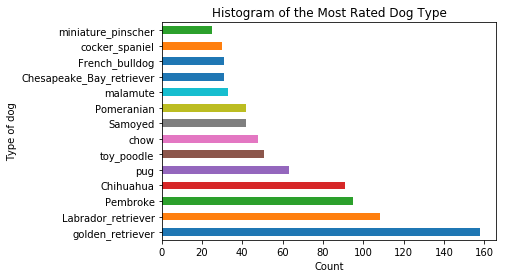

In [404]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### Insight Two

> Clumber has the highest average rating and Japanese_spaniel has the lowest average rating. 

In [405]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,retweeted
dog_type,,,,,,
Afghan_hound,8.171385e+17,9.666667,10.0,6760.000000,1781.000000,0.0
Airedale,7.184489e+17,9.833333,10.0,5058.500000,1297.250000,0.0
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,5717.111111,1865.111111,0.0
Appenzeller,7.939334e+17,11.000000,10.0,NaN,NaN,NaN
Australian_terrier,7.785921e+17,11.500000,10.0,10653.000000,2897.500000,0.0


In [406]:
df_dog_type_sorted = df_dog_type_mean['rating_numerator'].sort_values()
df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
Maltese_dog                     9.315789
dalmatian                       9.333333
Boston_bull                     9.416667
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
Afghan_hound                    9.666667
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Airedale                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
Saint_Bernard                   9.857143
miniature_poodle                9.875000
English_setter                  9.875000
Great_Dane                     10.000000
papillon                       10.000000
Ibizan_hound                   10.000000
miniatu

### Insight 3 & Visualization

>Dog_types with low number of ratings show a high variaty of mean ratings.

In [407]:
df_dog_type_count = df_twitter.groupby('dog_type').count()
df_dog_type_count

,tweet_id,date,time,name,rating_numerator,rating_denominator,Dog_stage,jpg_url,confidence_list,favorite_count,retweet_count,retweeted,source,user
dog_type,,,,,,,,,,,,,,
Afghan_hound,3,3,3,3,3,3,3,3,3,1,1,1,1,1
Airedale,12,12,12,12,12,12,12,12,12,8,8,8,8,8
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,9,9,9,9,9
Appenzeller,2,2,2,2,2,2,2,2,2,0,0,0,0,0
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,4,4,4,4,4
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,8,8,8,8,8
Blenheim_spaniel,11,11,11,11,11,11,11,11,11,6,6,6,6,6
Border_collie,12,12,12,12,12,12,12,12,12,7,7,7,7,7


In [408]:
dog_type_count = df_dog_type_count['rating_numerator']
dog_type_mean = df_dog_type_mean['rating_numerator']
dog_type_mean

dog_type
Afghan_hound                       9.666667
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.272727
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.142857
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.516484
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.875000
English_springer                  10.500000
EntleBucher                       11.000000
Eskimo_dog             

In [409]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,3,9.666667
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,11,11.272727
Border_collie,12,10.583333


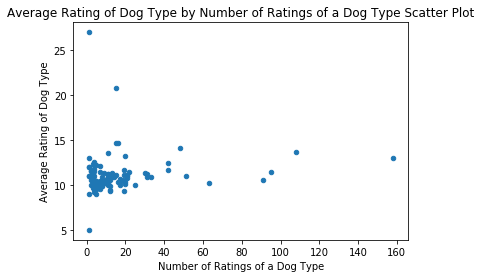

In [410]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

### Insight four & visualization

> The highest ratings do not receive the most retweets.

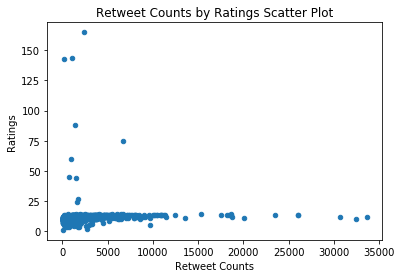

In [411]:
df_twitter.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');